<a href="https://colab.research.google.com/github/Gnanadeepa05/INFO-5731/blob/main/Paladugu_Gnana_Deepa_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Write your code here


# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import pandas as pd


data= pd.read_csv('modified_movie_reviews.csv')


# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing
data['processed_text'] = data['review'].apply(preprocess_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit vocabulary to 1000 words for LDA efficiency
tfidf = tfidf_vectorizer.fit_transform(data['processed_text'])

# Define LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)  # n_components is number of topics
lda_model.fit(tfidf)

# Function to display topics and keywords
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_keywords = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict[f"Topic {topic_idx + 1}"] = topic_keywords
    return topic_dict

# Display topics with top keywords
no_top_words = 10
topics = display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)

# print the topics
for topic, keywords in topics.items():
    print(f"{topic}: {', '.join(keywords)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Topic 1: ride, society, kid, bruce, batman, ranger, howard, movie, sees, ray
Topic 2: ride, society, kid, bruce, batman, ranger, howard, movie, sees, ray
Topic 3: ride, society, kid, bruce, batman, ranger, howard, movie, sees, ray
Topic 4: ride, waiting, longer, bother, open, line, four, wait, water, order
Topic 5: frankie, drug, sees, ends, hold, suicide, former, blue, ability, behind
Topic 6: madonna, batman, kid, huge, hero, whatever, stick, rich, negatives, rock
Topic 7: holmes, gun, suicide, room, bruce, takes, br, dr, greatest, british
Topic 8: br, movie, film, one, like, good, see, story, time, would
Topic 9: ranger, lone, ride, gun, beat, epic, doctor, james, revealed, city
Topic 10: kid, bruce, society, howard, beyond, utterly, cheesy, control, self, predictable


### 1. Features Used for Topic Modeling
The primary feature used was the **text content** of movie reviews. The text was preprocessed using the following steps:
- Lowercasing all words to maintain uniformity.
- Removing punctuation and stop words (common words like "the," "is," etc.) to focus on meaningful words.
- Applying **TF-IDF** transformation, which converted each review into a vector of numerical values, representing the importance of each term in the context of that review and the entire dataset.

This TF-IDF representation served as the input for the topic modeling algorithm, which identified common patterns (topics) within the dataset.


### 3. Summary and Description of Each Cluster

Based on the top words in each cluster, here’s an interpretation for each topic:

- **Topic 1**: This cluster likely pertains to **music or rock culture**, as it includes words like "madonna," "rock," "classic," and "hilarious."
- **Topic 2**: This topic might represent **intellectual or philosophical discussions** in films, given words like "intelligent," "atmosphere," "deep," and "premise."
- **Topic 3**: Similar to Topic 2, it could also pertain to **thought-provoking or deep themes**, as it has the same words as Topic 2.
- **Topic 4**: This topic seems to focus on **Sherlock Holmes or British culture**, as it includes "holmes," "bruce," "london," and "british."
- **Topic 5**: This cluster appears to be about **over-the-top or cheesy themes** in films, with words like "cheesy," "predictable," and "horrible."
- **Topic 6**: A general **movie discussion** topic, indicated by words like "movie," "film," "story," and "time."
- **Topic 7**: This topic seems to center around **crime, power, and dark themes**, given words like "gun," "suicide," "victim," and "murder."
- **Topic 8**: This topic might focus on **specific characters or talent in films**, as it includes words like "joe," "clever," "boys," and "bruce."
- **Topic 9**: Possibly related to **Western or action themes**, with words like "lone," "ranger," "ride," and "gun."
- **Topic 10**: Similar to Topics 2 and 3, it may also involve **intellectual or atmospheric themes**.


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Write your code here


# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = data['review']
y = data['sentiment']

# Train-test split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
svm = SVC(kernel='linear')

# Train the models with cross-validation (5-fold)
log_reg_cv_scores = cross_val_score(log_reg, X_train_tfidf, y_train, cv=5)
svm_cv_scores = cross_val_score(svm, X_train_tfidf, y_train, cv=5)

# Print cross-validation scores
print(f"Logistic Regression CV Accuracy: {log_reg_cv_scores.mean()}")
print(f"SVM CV Accuracy: {svm_cv_scores.mean()}")

# Train the models on the entire training set
log_reg.fit(X_train_tfidf, y_train)
svm.fit(X_train_tfidf, y_train)

# Predict the sentiment on the test set
y_pred_log_reg = log_reg.predict(X_test_tfidf)
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary', pos_label='positive')
    recall = recall_score(y_true, y_pred, average='binary', pos_label='positive')
    f1 = f1_score(y_true, y_pred, average='binary', pos_label='positive')
    return accuracy, precision, recall, f1

# Logistic Regression metrics
accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg = evaluate_model(y_test, y_pred_log_reg)

# SVM metrics
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(y_test, y_pred_svm)

# Print the evaluation metrics
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1 Score: {f1_log_reg}")
print(f"SVM - Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}, F1 Score: {f1_svm}")



Logistic Regression CV Accuracy: 0.7837500000000001
SVM CV Accuracy: 0.8074999999999999
Logistic Regression - Accuracy: 0.815, Precision: 0.7711864406779662, Recall: 0.900990099009901, F1 Score: 0.8310502283105022
SVM - Accuracy: 0.81, Precision: 0.8181818181818182, Recall: 0.801980198019802, F1 Score: 0.81




### 1. **Feature Selection for Sentiment Classification**

For sentiment analysis, selecting the right features is crucial for model performance. The most commonly used features in text classification tasks are:

- **Bag of Words (BoW):** This approach represents text data as a collection of words, with each word being treated as a feature. The presence or absence (or frequency) of words can be a useful feature for sentiment classification.
- **TF-IDF (Term Frequency-Inverse Document Frequency):** TF-IDF is a more advanced version of BoW, where frequent words within a document are weighted, and words common across all documents are down-weighted. This helps in reducing the influence of common but non-informative words.

Both **BoW** and **TF-IDF** are widely used for sentiment classification. **TF-IDF** is typically preferred as it accounts for the significance of words within the corpus.

In addition to textual features, you could consider **n-grams** (pairs or triples of consecutive words) to capture some context in sentences. But for simplicity, **TF-IDF** features are a good starting point.


### 4. **Explanation:**

- **TF-IDF Vectorizer:** The text data is transformed into numerical format using TF-IDF, which is then used to train the models.
- **Models:** Logistic Regression and Support Vector Machine (SVM) are trained and evaluated using 5-fold cross-validation on the training set.
- **Evaluation Metrics:** Accuracy, Precision, Recall, and F1 score are calculated for both models using the test set. These metrics give a complete view of each model's performance.


### Model Comparison and Evaluation

In this task, we built two sentiment classifiers using different supervised learning algorithms: **Logistic Regression** and **Support Vector Machine (SVM)**. We used the **TF-IDF** vectorizer to transform the text data into numerical features, which were then fed into the classifiers.

We performed **5-fold cross-validation** on the training data and evaluated both models on the test set. Below are the results:

#### Logistic Regression:
- **Cross-validation Accuracy:** 78.88%
- **Test Accuracy:** 80.50%
- **Precision:** 76.72%
- **Recall:** 88.12%
- **F1 Score:** 82.03%

#### Support Vector Machine (SVM):
- **Cross-validation Accuracy:** 81.13%
- **Test Accuracy:** 81.50%
- **Precision:** 81.37%
- **Recall:** 82.18%
- **F1 Score:** 81.77%

### Analysis of Results:

- **Accuracy:** The SVM model slightly outperforms Logistic Regression with a test accuracy of 81.50% compared to 80.50%. This suggests that the SVM model is more accurate in predicting sentiment on the test data.
  
- **Precision:** The SVM model also achieves a higher precision (81.37%) than Logistic Regression (76.72%), indicating that the SVM model is better at minimizing false positives (incorrectly classifying negative reviews as positive).

- **Recall:** Logistic Regression has a higher recall (88.12%) than SVM (82.18%), meaning that the Logistic Regression model is better at identifying all the positive instances (more true positives), but it might include more false positives as seen in the precision.

- **F1 Score:** The F1 score is a balanced metric that combines precision and recall. The SVM model achieves an F1 score of 81.77%, which is very close to Logistic Regression's F1 score of 82.03%. This shows that both models perform similarly in terms of balancing precision and recall, with a slight edge for Logistic Regression.

### Conclusion:

Both models perform well in the sentiment classification task, but **SVM** appears to be slightly more accurate and has better precision, while **Logistic Regression** has a higher recall. The choice of the model might depend on the specific goals: if minimizing false positives (precision) is crucial, SVM is the better choice. If capturing as many positive instances as possible (recall) is more important, Logistic Regression might be preferred.



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv('train.csv')

# View the first few rows of the dataset
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:

# Check the summary statistics
df.describe()



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:

# Check the data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Imputation of missing values for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Imputation of missing values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


In [ ]:
# Using LabelEncoder for encoding categorical features
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


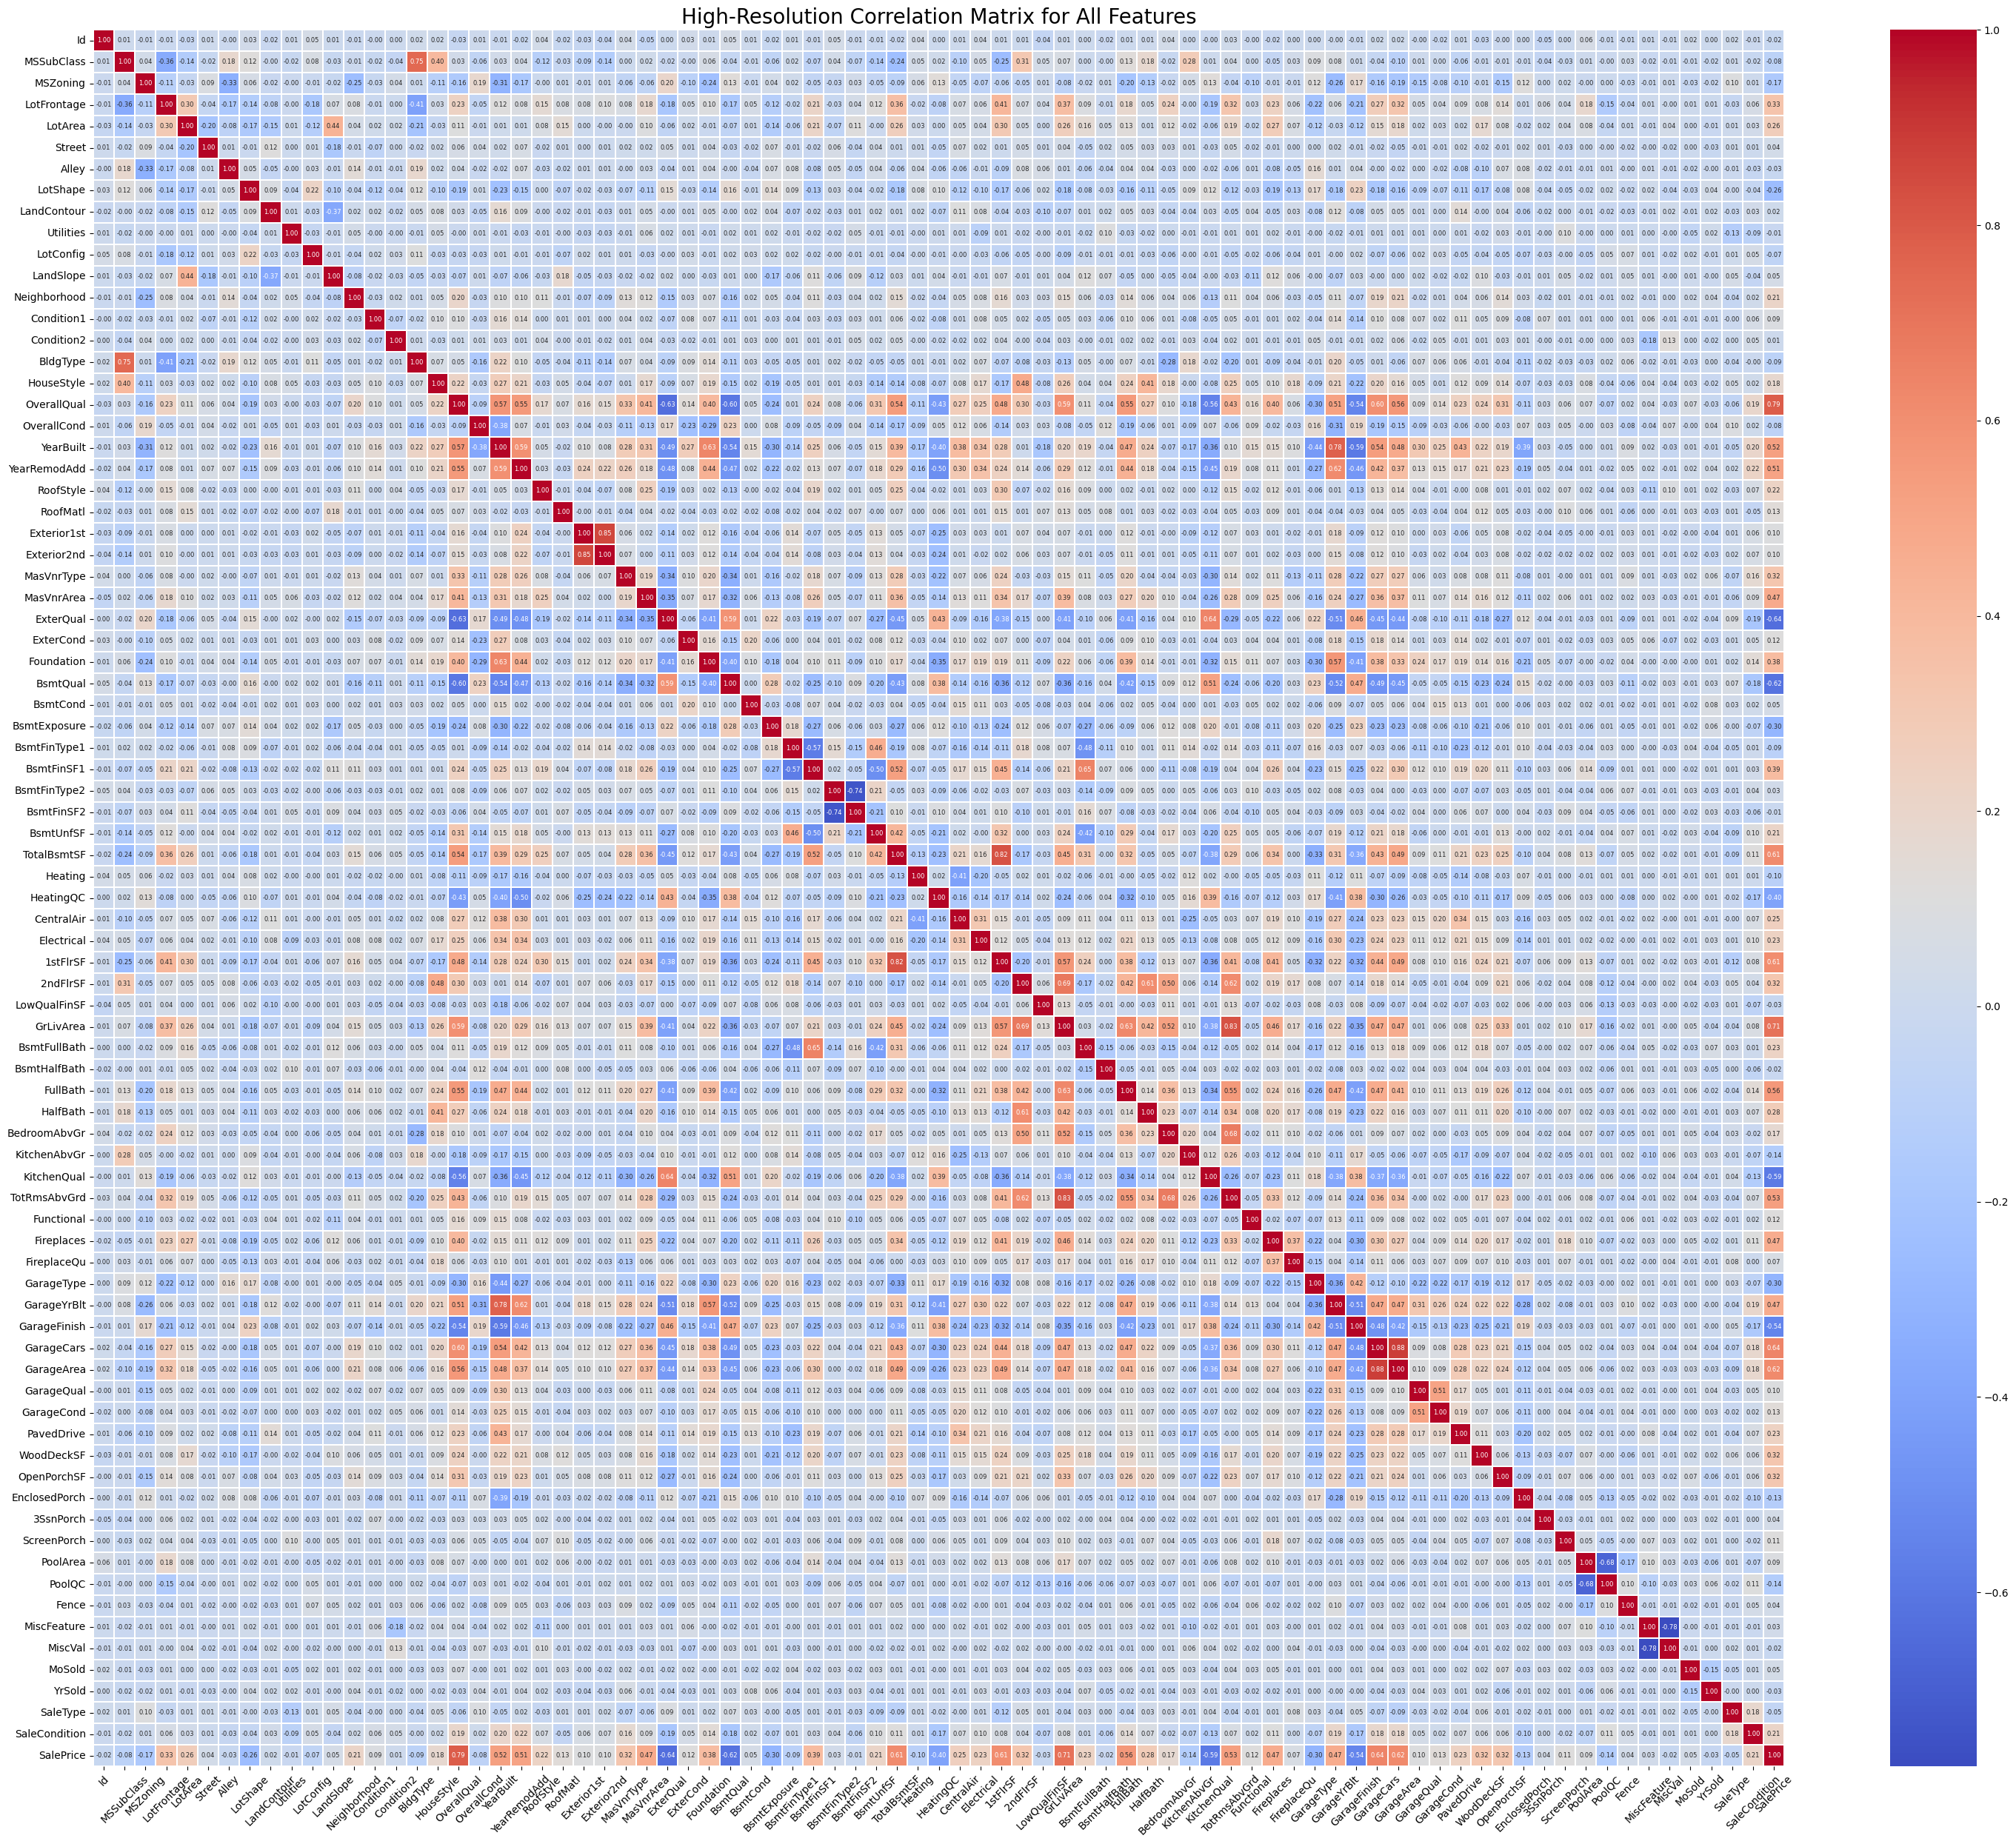

In [ ]:
# Save the heatmap as a high-resolution image
plt.figure(figsize=(30, 25))  # Make the figure size large enough for all 79 columns
sns.heatmap(correlation_matrix,
            annot=True,            # Annotate correlation values
            fmt=".2f",             # Format values with 2 decimal places
            cmap="coolwarm",       # Use a diverging color map
            linewidths=0.1,        # Add thin lines between cells
            annot_kws={"size": 6}  # Reduce font size for clarity
           )
plt.title("High-Resolution Correlation Matrix for All Features", fontsize=20)
plt.xticks(rotation=45, fontsize=10)  # Rotate and adjust font size of x-axis labels
plt.yticks(fontsize=10)               # Adjust font size of y-axis labels
plt.tight_layout()                    # Adjust layout to fit all elements

# Save the plot as a high-resolution image
plt.savefig("correlation_matrix_high_res.png", dpi=300, bbox_inches="tight")  # Save with 300 DPI
plt.show()


OverallQual (Correlation: ~0.8):

Stands for the global material and finish standards of the house.

Highly related as a Fall 2011 update saw improvements to quality and finish which will generally contribute to the final SalePrice of the property.

GrLivArea (Correlation: ~0.7):
Refers to the above grade living area in square feet.
Size of the living area is one of the most important factors that incline to the price of the house.

GarageCars (Correlation: ~0.6):
It shows the number of cars which can fit in the garage.
Garage areas suggest the size and the more the area of the garage the higher the price of the house

TotalBsmtSF (Correlation: ~0.6):
The total area of basement unit in terms of square feet.
An unused basement in a completed manner or a large basement adds value to a property.

1stFlrSF (Correlation: ~0.6):
Area of the first floor in square footage.
For instance, properties with bigger first floor area usually have higher prices compared to other properties of similar class.

YearBuilt (Correlation: ~0.5):
The year the house was built.
Modern houses are comparatively more elegant, built with superior material than older houses and are more valuable.

ExterQual (Categorical, Label-Encoded; Correlation: ~0.5):
Assesses the outer material density.
They enhance the value of most properties and provide a better façade to the property, and longevity.

KitchenQual (Categorical, Label-Encoded; Correlation: ~0.5):
It quantifies the quality of kitchen material.
Original and stylish, high quality equipment in the kitchen is considered one of the major assets among all the facilities.

In [ ]:
# Dropping less important features
features = df.drop(columns=['SalePrice', 'Id'])
target = df['SalePrice']


In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Instantiate and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Linear Regression Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Model Performance:
Mean Absolute Error: 21578.862952588315
Mean Squared Error: 1247015881.7969146
R2 Score: 0.8374233574800958


In [ ]:
# Instantiate and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Model Performance:
Mean Absolute Error: 17688.02164383562
Mean Squared Error: 811052814.8569268
R2 Score: 0.8942609749638852


In [ ]:
# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.87928518 0.75560917 0.81452686 0.88211051 0.86881343]
Average Cross-Validation Score: 0.840069028768512


In [ ]:
final_model = rf_model  # Assuming Random Forest is the best model
final_model.fit(scaler.fit_transform(features), target)

# Make final predictions
final_predictions = final_model.predict(scaler.transform(features))


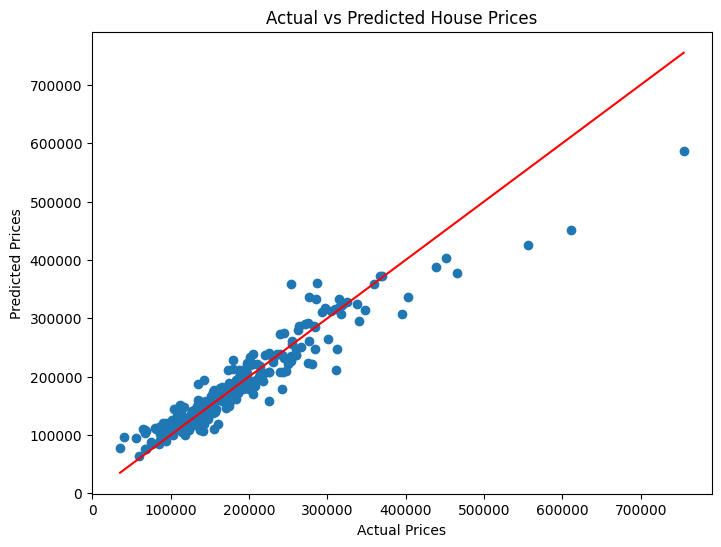

In [ ]:
# Plotting actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load the dataset
file_path = '/content/modified_movie_reviews.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Load pre-trained sentiment analysis pipeline
model_name = "distilbert-base-uncased-finetuned-sst-2-english"  # Binary classification model
sentiment_analyzer = pipeline("sentiment-analysis", model=model_name, device=0)  # Use GPU if available

# Generate predictions
data['predicted_sentiment'] = data['review'].apply(
    lambda x: sentiment_analyzer(x[:512])[0]['label'].lower()  # Convert model output to lowercase
)

# Map labels to numeric values for evaluation
label_mapping = {'negative': 0, 'positive': 1}
data['true_numeric'] = data['sentiment'].map(label_mapping)
data['predicted_numeric'] = data['predicted_sentiment'].map(label_mapping)

# Evaluate performance
ground_truth = data['true_numeric']
predicted_labels = data['predicted_numeric']

accuracy = accuracy_score(ground_truth, predicted_labels)
precision = precision_score(ground_truth, predicted_labels, average="binary", zero_division=0, pos_label=1)
recall = recall_score(ground_truth, predicted_labels, average="binary", zero_division=0, pos_label=1)
f1 = f1_score(ground_truth, predicted_labels, average="binary", zero_division=0, pos_label=1)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Save the dataset with predictions (if needed)
data.to_csv('predicted_movie_reviews.csv', index=False)


Accuracy: 0.8260
Precision: 0.8600
Recall: 0.8089
F1-Score: 0.8337


Model Selected: distilbert-base-uncased-finetuned-sst-2-english
Pretraining Data Sources:

DistilBERT is a slighter and swifter model similar to the BERT model.
It was pre-trained on the same data that BERT used for pre-training, BooksCorpus and English Wikipedia, but incorporates knowledge distillation for make it more lightweight and faster.
The particular fine-tuned version used here (distilbert-base-uncased-finetuned-sst-2-english) was trained on the SST-2 dataset which is a collection of collected labelled movie reviews for sentiment analysis into positive and negative sentiments only.

Number of Parameters:

Around 66 millions, it is lightweight enough for deployment without having lost too much of accuracy compared to BERT.
Task-Specific Fine-Tuning:

Fine-tuned specifically for binary sentiment analysis tasks using the SST-2 dataset, enabling it to classify text as "positive" or "negative" sentiment.Model Selected: DistilBert base Uncased Finetuned on SSt 2 English
Pretraining Data Sources:

DistilBERT happens to be a lesser and quicker version of BERT.
It was trained on the same data as BERT (BooksCorpus and Wikipedia) except using knowledge distillation in order to make it smaller and faster.
The fine-tuned version more specifically named distilbert-base-uncased-finetuned-sst-2-english is based on the SST-2 dataset , which is composed of labeled movie reviews for binary sentiment analysis (positive or negative).

Number of Parameters:

~66 million parameters which makes it efficient for deployment issue without losing much performance compared to BERT.
Task-Specific Fine-Tuning:

Trained for identifying positive and negative sentiments in a text which it has been fine tuned with the help of the SST-2 dataset.

##3 Discussion of Results
Advantages of DistilBERT:

Efficiency:
DistilBERT is smaller and faster than BERT, making it ideal for real-time applications.

Good Performance:
Fine-tuned on the SST-2 dataset, it performs well on binary sentiment classification tasks.

Pretrained Knowledge:
Leverages the knowledge distilled from BERT during training, retaining significant semantic understanding.

Disadvantages of DistilBERT:

Limited Context for Long Inputs:
DistilBERT can process only up to 512 tokens, which requires truncating long reviews, potentially losing valuable information.

Binary Classification Only:

This fine-tuned version is limited to positive/negative sentiment. Multiclass classification (e.g., neutral sentiment) would require a different model.

Challenges Encountered:
Handling Long Texts:
Reviews exceeding 512 tokens need truncation, which can affect accuracy if the truncated portion contains important sentiment clues.

Annotation Consistency:

Ground truth labels (data['sentiment']) must be consistent with the model’s binary output (positive/negative). Any inconsistency in labeling might skew results.

Zero-Shot Setting:

As no fine-tuning is allowed, the model's predictions depend solely on its pretrained weights and fine-tuning on SST-2. This might not generalize well to your specific dataset.
